**Aim of the Project**<br>
The aim of the project is to build a Machine Learning
Model to predict whether an owner will initiate an auto
insurance claim in the next year.<br>
**Use Cases**<br>
The model shall mainly support the following use cases:<br>
1. Conquering Market Share: Capture market share by lowering the prices of the premium
for the customers, who are least likely to claim.<br>
2. Risk Management: Charge the right premium from the customer, who is likely to claim
insurance in the coming year<br>
3. Smooth Processing: Reduce the complexity of pricing models. Most of the transactions
are happening online with larger customer attributes (thanks to the internet and social
media). Harness the power of huge data to build complex ML models<br>
4. Increased Profits: As per industry estimate 1% reduction in the claim can boost profit by
10%. So, through the ML model, we can identify and deny the insurance to the driver
who will make a claim. Thus, ensuring reduced claim outgo and increased profit.<br>
Part of the model development is to identify and prioritize the above use cases.<br>

Printing current directory in Google colab and creating a subdirectory as /data/

In [0]:
import os
path=os.getcwd()
print("Current Directory",os.getcwd())
newDir=path+'/data/'
os.mkdir(newDir)
print("New Directory created as /content/data/")

Current Directory /content
New Directory created as /content/data/


In [0]:
outputDir=path+'/output/'
os.mkdir(outputDir)
print("New Directory created as /content/output/")

New Directory created as /content/output/


In [0]:
trainedMdlDir=path+'/trained_models/'
os.mkdir(trainedMdlDir)
print("New Directory created as /content/trained_models/")

New Directory created as /content/trained_models/


In [59]:
! curl -0 https://www.georgeburry.com/images/Kaggle_competition_insurance-claims_files/newplot.png --output /content/data/newplot.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 96044  100 96044    0     0   455k      0 --:--:-- --:--:-- --:--:--  455k


Installing the python module scikit-plot as it was not available in colab

In [60]:
pip install scikit-plot

# Importing the dependencies 

We will be using numpy, matplotlib, keras, tensorflow,RandomForestClassifier etc packages in this exercise.
Below impoart statements will import necessary python libraries as used in this project in various places

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.externals import joblib

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

import scikitplot as skplt

# Loading the train.csv file as provided in LMS and displaying a maximum of five decimal places for better clarity. 

Also the dataset can be downloaded from kaggle as well from below given url <br> https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data

In [62]:
pd.options.display.float_format = '{:.5f}'.format
df=pd.read_csv("/content/data/train.csv")
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.70000,0.20000,0.71807,10,1,-1,0,1,4,1,0,0,1,12,2,0.40000,0.88368,0.37081,3.60555,0.60000,0.50000,0.20000,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.80000,0.40000,0.76608,11,1,-1,0,-1,11,1,1,2,1,19,3,0.31623,0.61882,0.38872,2.44949,0.30000,0.10000,0.30000,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.00000,0.00000,-1.00000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.31623,0.64159,0.34728,3.31662,0.50000,0.70000,0.10000,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.90000,0.20000,0.58095,7,1,0,0,1,11,1,1,3,1,104,1,0.37417,0.54295,0.29496,2.00000,0.60000,0.90000,0.10000,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.70000,0.60000,0.84076,11,1,-1,0,-1,14,1,1,2,1,82,3,0.31607,0.56583,0.36510,2.00000,0.40000,0.60000,0.00000,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


## Summary of Dataframe

In [63]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000,595212.00000
mean,743803.55843,0.03645,1.90038,1.35894,4.42332,0.41679,0.40519,0.39374,0.25703,0.16392,0.18530,0.00037,0.00169,0.00944,0.00095,0.01245,7.29992,0.66082,0.12108,0.15345,0.61099,0.43918,0.55110,8.29593,0.82995,-0.50490,0.72519,-0.15773,6.55534,0.91003,0.83208,1.32889,0.99214,62.21567,2.34607,0.37994,0.81326,0.27626,3.06590,0.44976,0.44959,0.44985,2.37208,1.88589,7.68945,3.00582,9.22590,2.33903,8.43359,5.44138,1.44192,2.87229,7.53903,0.12243,0.62784,0.55418,0.28718,0.34902,0.15332
std,429367.82043,0.18740,1.98379,0.66459,2.69990,0.49331,1.35064,0.48858,0.43700,0.37020,0.38854,0.01931,0.04110,0.09669,0.03077,0.12754,3.54604,0.47343,0.32622,0.36042,0.28764,0.40426,0.79351,2.50827,0.37568,0.78865,2.15346,0.84442,5.50144,0.34711,0.37380,0.97875,0.09162,33.01246,0.83255,0.05833,0.22459,0.35715,0.73137,0.28720,0.28689,0.28715,1.11722,1.13493,1.33431,1.41456,1.45967,1.24695,2.90460,2.33287,1.20296,1.69489,2.74665,0.32778,0.48338,0.49706,0.45245,0.47666,0.36029
min,7.00000,0.00000,0.00000,-1.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,-1.00000,0.00000,-1.00000,0.00000,-1.00000,0.00000,-1.00000,0.00000,1.00000,-1.00000,-1.00000,0.25062,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,371991.50000,0.00000,0.00000,1.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,0.00000,0.00000,0.00000,0.40000,0.20000,0.52500,7.00000,1.00000,-1.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,32.00000,2.00000,0.31623,0.67087,0.33317,2.82843,0.20000,0.20000,0.20000,2.00000,1.00000,7.00000,2.00000,8.00000,1.00000,6.00000,4.00000,1.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,743547.50000,0.00000,1.00000,1.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,7.00000,1.00000,0.00000,0.00000,0.70000,0.30000,0.72068,7.00000,1.00000,-1.00000,0.00000,0.00000,7.00000,1.00000,1.00000,2.00000,1.00000,65.00000,3.00000,0.37417,0.76581,0.36878,3.31662,0.50000,0.40000,0.50000,2.00000,2.00000,8.00000,3.00000,9.00000,2.00000,8.00000,5.00000,1.00000,3.00000,7.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000
75%,1115548.75000,0.00000,3.00000,2.00000,6.00000,1.00000,0.00000,1.00000,1.0000

## Printing Datatypes of dtaframe

In [64]:
df.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

<strong>Printing Number of rows</strong>

In [65]:
rows = len(df)
rows

595212

# Target Value Inspection
<br>
Now lets try to visualize the target variable proportion and distribution as a pie chart. It clearly indecates that the value 0 is having major portion in the target variable as compared to the other value available as 1. This clearly indecates that there is some inbalances for the target variable for the given dataset which needs to be balanced.

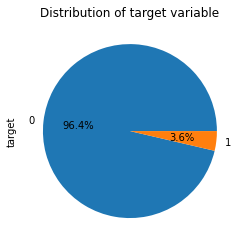

In [66]:
df['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of target variable')
plt.show()

# Handling imbalance cases
<br>
As a next step , we need to find out the  indices of the same per target  indices and will randomly select records with target=0 to get at the desired a priori .Below steps will reduce the imbalance in the given dataset which we have visualized in previous step

In [67]:
train=df
desired_apriori = 0.10

# Get the indices per target value
idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0 : {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
from sklearn.utils import shuffle

undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)


Rate to undersample records with target=0 : 0.34043569687437886
Number of records with target=0 after undersampling: 195246


Now Lets try to visualize the target variable distribution after completing above balancing steps. From below pie chart it is evident that the number of 1 and 0 has been balced to a better value.

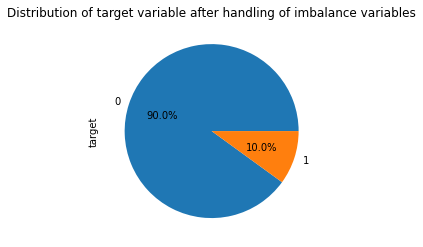

In [68]:
train['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of target variable after handling of imbalance variables')
plt.show()

# Data Quality check
<br> Now lets check for the data quality. We will try to pring the number of null values.Below result indecates that there is no null values in the given dataset  as the functio has returned False.

In [69]:
train.isnull().any().any()

False

Now lets try to plot the missing numbers on each of the columns

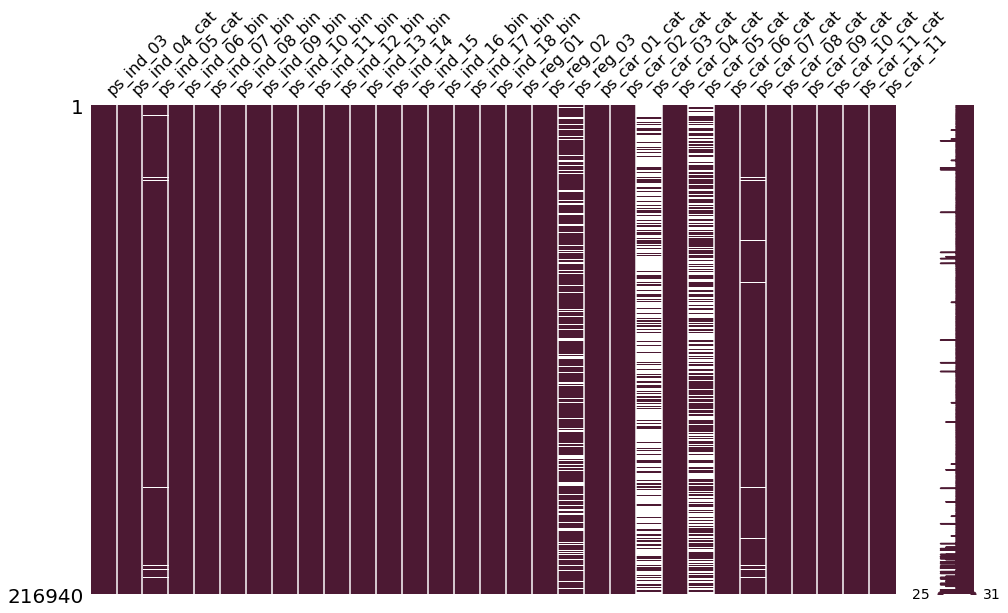

In [70]:
train_check_null = train
train_check_null = train_check_null.replace(-1,np.NaN)

import missingno as msno
msno.matrix(train_check_null.iloc[:,4:35],figsize=(16,9),color=(0.3,0.1,0.2))

Also we will list out the column names which is having missing values.

In [71]:
missing_col = []
for c in train_check_null.columns:
    if train_check_null[c].isnull().sum() > 0:
        missing_col.append(c)
        print('col : {:<15}, Nan records : {:>6}, Nan ratio : {:.3f}'.format(c, train_check_null[c].isnull().sum(), 100*(train_check_null[c].isnull().sum()/train_check_null[c].shape[0])))

col : ps_ind_02_cat  , Nan records :    103, Nan ratio : 0.047
col : ps_ind_04_cat  , Nan records :     51, Nan ratio : 0.024
col : ps_ind_05_cat  , Nan records :   2256, Nan ratio : 1.040
col : ps_reg_03      , Nan records :  38580, Nan ratio : 17.784
col : ps_car_01_cat  , Nan records :     62, Nan ratio : 0.029
col : ps_car_03_cat  , Nan records : 148367, Nan ratio : 68.391
col : ps_car_05_cat  , Nan records :  96026, Nan ratio : 44.264
col : ps_car_07_cat  , Nan records :   4431, Nan ratio : 2.043
col : ps_car_09_cat  , Nan records :    230, Nan ratio : 0.106
col : ps_car_11      , Nan records :      1, Nan ratio : 0.000
col : ps_car_14      , Nan records :  15726, Nan ratio : 7.249


**Seperating features and printing the initial inferences on various featurs and cetegorze as Numeric,Binary & Categirycal**<br>
The dataset includes numerical, categorical and binary features. The numerical features consist of ordinal and float values. Each feature type needs to be treated separately, so first of all we can create three lists of columns for the three feature types.

In [72]:
# separate col names into categories
cols = df.columns
num_feats, cat_feats, bin_feats = [], [], []

for col in cols:
    if col == 'id' or col == 'target':
        pass
    elif '_cat' in col:
        cat_feats.append(col)
    elif '_bin' in col:
        bin_feats.append(col)
    else:
        num_feats.append(col)
        
print('--- Numerical features --- : ', '\n', num_feats, '\n')
print('--- Categorical features --- : ', '\n', cat_feats, '\n')
print('--- Binary features --- : ', '\n', bin_feats, '\n')

--- Numerical features --- :  
 ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'] 

--- Categorical features --- :  
 ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'] 

--- Binary features --- :  
 ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'] 



**Data cleaning and Preprocessing**<br>
The next step is to check how many missing values there are for each feature type.Eliminating the features where more than one half of the values are missing.

In [0]:
# Although it uses more memory, I prefer to create a new copy of the dataframe for each section
df_cleaned = df.copy()

# I will also create copies for the feature lists
num_feats_cleaned = num_feats.copy()
cat_feats_cleaned = cat_feats.copy()
bin_feats_cleaned = bin_feats.copy()

**Numerical features**<br>
Let's check for missing values (-1) in the numerical feature columns.

In [74]:
# I would like to eliminate any columns that consist of more than one half missing values (-1)
num_many_missing = df_cleaned[num_feats_cleaned][df == -1].count() / len(df) > 0.50 # more than 50% missing values
num_many_missing = num_many_missing.index[num_many_missing == True].tolist()
print(num_many_missing)

[]


No columns were returned. We can also have a look at exactly how many are missing in the applicable columns.

In [75]:
counts = df_cleaned[num_feats_cleaned][df == -1].count()
cols_with_missing = counts[counts.values > 0]
print('Column  ', 'Missing count  ', 'Missing ratio')
for col, count in zip(cols_with_missing.index, cols_with_missing.values):
    print(col, '  ', count, '  ', '{:.3f}'.format(count / len(df)))

Column   Missing count   Missing ratio
ps_reg_03    107772    0.181
ps_car_11    5    0.000
ps_car_12    1    0.000
ps_car_14    42620    0.072


We can substitute the missing values with the applicable column mean. This will limit their impact on the results.

In [76]:
# The few missing values that remain will be substituted with the column mean
for col in num_feats_cleaned:
    df_cleaned[col][df_cleaned[col] == -1] = df_cleaned[col].mean()
# Check that no missing values remain
(df_cleaned[num_feats_cleaned] == -1).sum().sum()   # sums instances of true for each column and then sums across columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

We can be satisfied that no missing values remain as the above step has returned 0 at the end<br><br>

**Categorical features**<br>
Eliminating any columns that consist of more than one-half missing values (-1).<br>If features contain a relatively small proportion of missing values, these values can be converted to dummy variables and may be a useful part of the analysis.

In [77]:
cat_many_missing = df_cleaned[cat_feats_cleaned][df == -1].count() / len(df) > 0.5
cat_many_missing = cat_many_missing.index[cat_many_missing == True].tolist()
print(cat_many_missing)

['ps_car_03_cat']


Only one column is returned (‘ps_car_03_cat’).

Cross verifying on the features on which it is having missing valuesin the applicable columns

In [78]:
counts = df_cleaned[cat_feats_cleaned][df == -1].count()
cols_with_missing = counts[counts.values > 0]
print('Column  ', 'Missing count  ', 'Missing ratio')
for col, count in zip(cols_with_missing.index, cols_with_missing.values):
    print(col, '  ', count, '  ', '{:.3f}'.format(count / len(df)))

Column   Missing count   Missing ratio
ps_ind_02_cat    216    0.000
ps_ind_04_cat    83    0.000
ps_ind_05_cat    5809    0.010
ps_car_01_cat    107    0.000
ps_car_03_cat    411231    0.691
ps_car_05_cat    266551    0.448
ps_car_07_cat    11489    0.019
ps_car_09_cat    569    0.001


Removes the columns that we have identified in above step

In [0]:
df_cleaned.drop(columns=cat_many_missing, inplace=True)
# The cat_feats list needs to be updated

In [0]:
for i in cat_many_missing: cat_feats_cleaned.remove(i)

Remaing missing values will be converted to dummy variables during the feature engineering stage.<br><br>

**Binary features**<br>
Let's now check for missing values among the binary features.

In [81]:
bin_many_missing = df_cleaned[bin_feats_cleaned][df == -1].count() / len(df) > 0.5
bin_many_missing = bin_many_missing.index[bin_many_missing == True].tolist()
print(bin_many_missing)

[]


No columns were returned where more than half of there values missing. Let’s just make sure that no values at all are missing for the binary features.

Ensuring that no features with more than half of there values missing. Ensure that no values at all are missing for the binary features.

In [82]:
# Check for missing values, in case any exist
counts = df_cleaned[bin_feats_cleaned][df == -1].count()
cols_with_missing = counts[counts.values > 0]
cols_with_missing

Series([], dtype: int64)

No more missing values

**Exploratory data analysis(EDA)**<br>
In this section, we will first explore the correlation between numerical features and then will explore the correlation between each feature and the target variable to gain insight into feature importance.<br><br>
Below given are the steps taken<br>
Analyze the datasets to summarize their main
characteristics (with visual methods). <br>A statistical
model can be used, primarily EDA can be used to
see what the data can tell us beyond the formal
modeling or hypothesis testing task.<br>
Following tasks can be performed as a part of EDA:<br>
o Scaling/Normalization<br>
o Fill the missing values<br>
o Feature selection & engineering<br>

Numerical features of float type

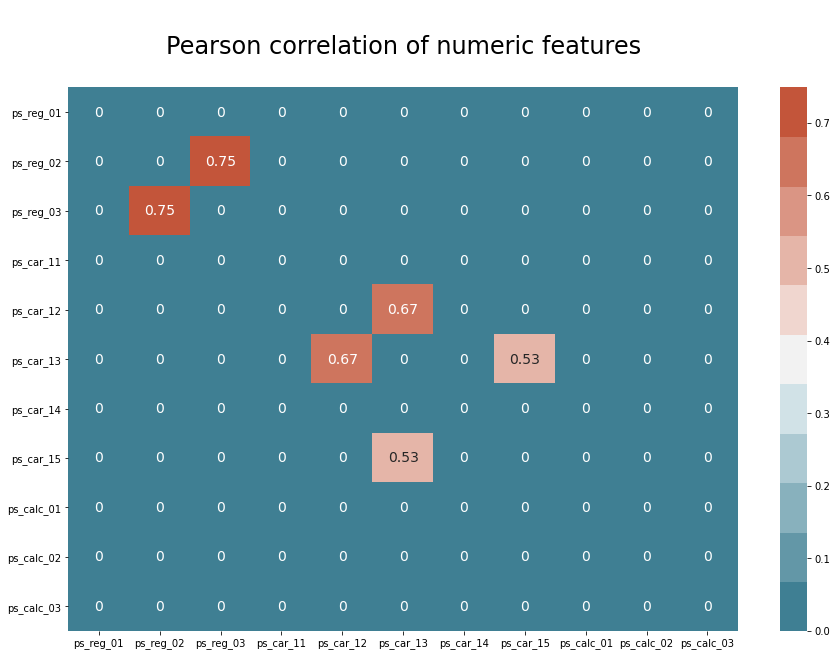

In [83]:
df_float = df_cleaned.select_dtypes(['float64'])
df_corr = df_float.corr().abs()
# Setting a filter for values of 1 or less than 0.5
filter = (df_corr == 1) | (df_corr < 0.5)
# We can filter out values by setting them to 0
df_corr[filter] = 0
df_corr

f, ax = plt.subplots(figsize=(15, 10))
plt.title("\nPearson correlation of numeric features\n", size=24)
sns.heatmap(df_corr, annot=True, annot_kws={'size': 14},
            cmap=sns.diverging_palette(220, 20, n=11))

From above correlation matrix we can see that there are strong correlations between four pairs of features.<br><br><br>


Ploting below the pair of the strongly correlated variables. <br>This way we can gain insight into the linear correlations between the features.

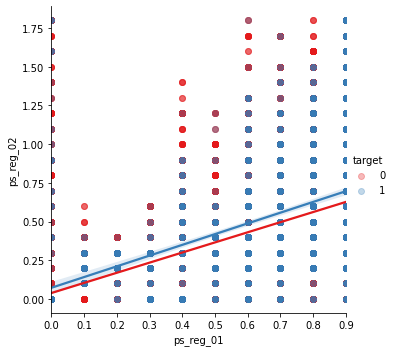

In [84]:
sns.lmplot(x='ps_reg_01', y='ps_reg_02', data=df_cleaned.sample(frac=0.1), hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

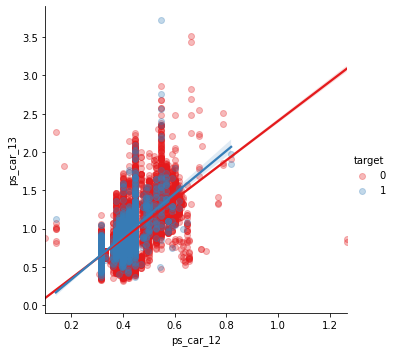

In [85]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=df_cleaned.sample(frac=0.1), hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

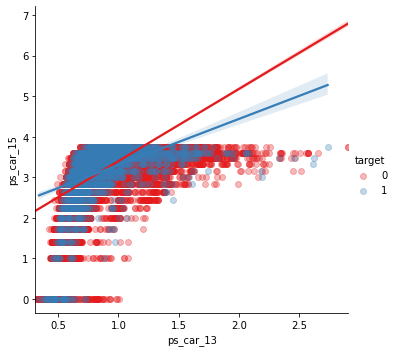

In [86]:
sns.lmplot(x='ps_car_13', y='ps_car_15', data=df_cleaned.sample(frac=0.1), hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

**Numerical features of ordinal type**<br>
Now lets try to figure out the numerical features or ordinal type and try to calculate the pearson coeff of the same and will draw a plot 

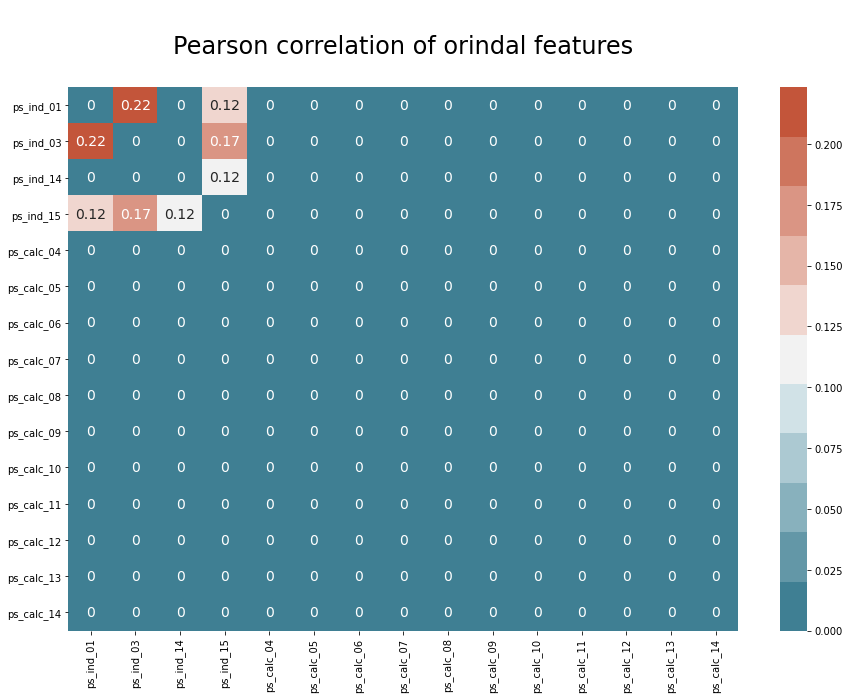

In [87]:
df_ordinal = df_cleaned[num_feats_cleaned].select_dtypes(include=['int'])
df_corr = df_ordinal.corr().abs()
filter = (df_corr == 1) | (df_corr < 0.1)
# We can filter out values by setting them to 0
df_corr[filter] = 0
df_corr

f, ax = plt.subplots(figsize=(15, 10))
plt.title("\nPearson correlation of orindal features\n", size=24)
sns.heatmap(df_corr, annot=True, annot_kws={'size': 14},
            cmap=sns.diverging_palette(220, 20, n=11))

The correlations are very small, so not worthy of consideration.<br>

Checking for the correlations between all numerical features and the target variables. Using the pointbiserialr tool from scipy.stats to check the correlation between the numerical values of the features and the binary values of the target. The pointbiserialr method returns the correlation and the p-value. If the p-value is more than 0.05 for any given correlation, we cannot reject a null-hypothesis and should consider eliminating the feature, as it has a negligible impact on the target variable.

In [88]:
# check correlation between cols and target
df_cleaned=df_cleaned.dropna()
num_weak_corr = []
for col in num_feats_cleaned:
    corr, p = pointbiserialr(df_cleaned[col], df_cleaned['target'])
    if p > .05:
        print(col.upper(), ' | Correlation: ', corr, '| P-value: ', p)
        num_weak_corr.append(col)

PS_CAR_11  | Correlation:  -0.0012200059764350445 | P-value:  0.3465855778614059
PS_CALC_01  | Correlation:  0.001781954651920297 | P-value:  0.1692009225910694
PS_CALC_02  | Correlation:  0.001359688978331617 | P-value:  0.294178988732877
PS_CALC_03  | Correlation:  0.0019069735964081537 | P-value:  0.1412294486403772
PS_CALC_04  | Correlation:  3.272045509967862e-05 | P-value:  0.9798605212640231
PS_CALC_05  | Correlation:  0.0007708801365321071 | P-value:  0.5520221328273487
PS_CALC_06  | Correlation:  8.182225978046185e-05 | P-value:  0.9496663863272775
PS_CALC_07  | Correlation:  -0.0001034769048524314 | P-value:  0.9363706750144979
PS_CALC_08  | Correlation:  -0.0010058548384197822 | P-value:  0.4377398858088322
PS_CALC_09  | Correlation:  0.0007189675843638668 | P-value:  0.5791119968796526
PS_CALC_10  | Correlation:  0.001060834044479389 | P-value:  0.4131106666326
PS_CALC_11  | Correlation:  0.00037143739489052963 | P-value:  0.7744467192571796
PS_CALC_12  | Correlation:  -0.0

**Categorical features**<br>
For checking correlation between the categorical features and the target variable, we can create a crosstab table using Pandas and apply the **Chi-squared** tool to determine a p-value. Once again, if the p-value is more than 0.05, then we could reject that feature.

In [89]:
cat_weak_corr = []
for col in cat_feats_cleaned:
    crosstab = pd.crosstab( df['target'], df_cleaned[col],  rownames = ['target'] , colnames =['feature'])
    chi2, p, dof, ex = chi2_contingency(crosstab, correction=False)
    if p > 0.05:
        print(col.upper(), ' | Chi2: ', chi2, ' | p-value: ', p)
        cat_weak_corr.append(col)

PS_CAR_10_CAT  | Chi2:  0.6489747744859562  | p-value:  0.7228978253269899


It appears that all but one of the categorical features are worth keeping.<br><br>

**Binary features**<br>
Repeating above steps for the binary variables in the same way as completed above for categorical variables.

In [90]:
bin_weak_corr = []
for col in bin_feats_cleaned:
    crosstab = pd.crosstab( df['target'], df_cleaned[col],  rownames = ['target'] , colnames =['feature'])
    chi2, p, dof, ex = chi2_contingency(crosstab)
    if p > 0.05:
        print(col.upper(), ' | Chi2: ', chi2, ' | p-value: ', p)
        bin_weak_corr.append(col)

PS_IND_10_BIN  | Chi2:  1.4908391520731943  | p-value:  0.22208630630633355
PS_IND_11_BIN  | Chi2:  2.192129807260059  | p-value:  0.13871738717830912
PS_IND_13_BIN  | Chi2:  3.188775952779365  | p-value:  0.07414551103659972
PS_CALC_15_BIN  | Chi2:  0.135285302884501  | p-value:  0.7130137900732124
PS_CALC_16_BIN  | Chi2:  0.22479812854296694  | p-value:  0.6354080551735377
PS_CALC_17_BIN  | Chi2:  0.015449567540015549  | p-value:  0.9010806852088695
PS_CALC_18_BIN  | Chi2:  0.17519257769002702  | p-value:  0.6755376371151457
PS_CALC_19_BIN  | Chi2:  1.7905405627285798  | p-value:  0.1808603146226591
PS_CALC_20_BIN  | Chi2:  0.6685114869634994  | p-value:  0.413571052217771


**Using classification tools**<br>
Another approach is to use a classication tool - such as random forest - to determine the importance of each feature. We can achieve this by fitting a model and then calling the feature_importances method.

In [91]:
# Sets up a classifier and fits a model to all features of the dataset
clf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=42)
clf.fit(df_cleaned.drop(['id', 'target'],axis=1), df_cleaned['target'])
# We need a list of features as well
features = df_cleaned.drop(['id', 'target'],axis=1).columns.values
print("--- COMPLETE ---")

--- COMPLETE ---


Dumping the model .pkl file

In [92]:
joblib.dump(clf, '/content/trained_models/RandomForest_clf_model.pkl')

['/content/trained_models/RandomForest_clf_model.pkl']

Creating a nice horizontal bar chart for visualising the ranking of most important features.<br> **Note:** This feature will work only if belwo given command is run on termilal jupyter labextension install @jupyterlab/plotly-extension)

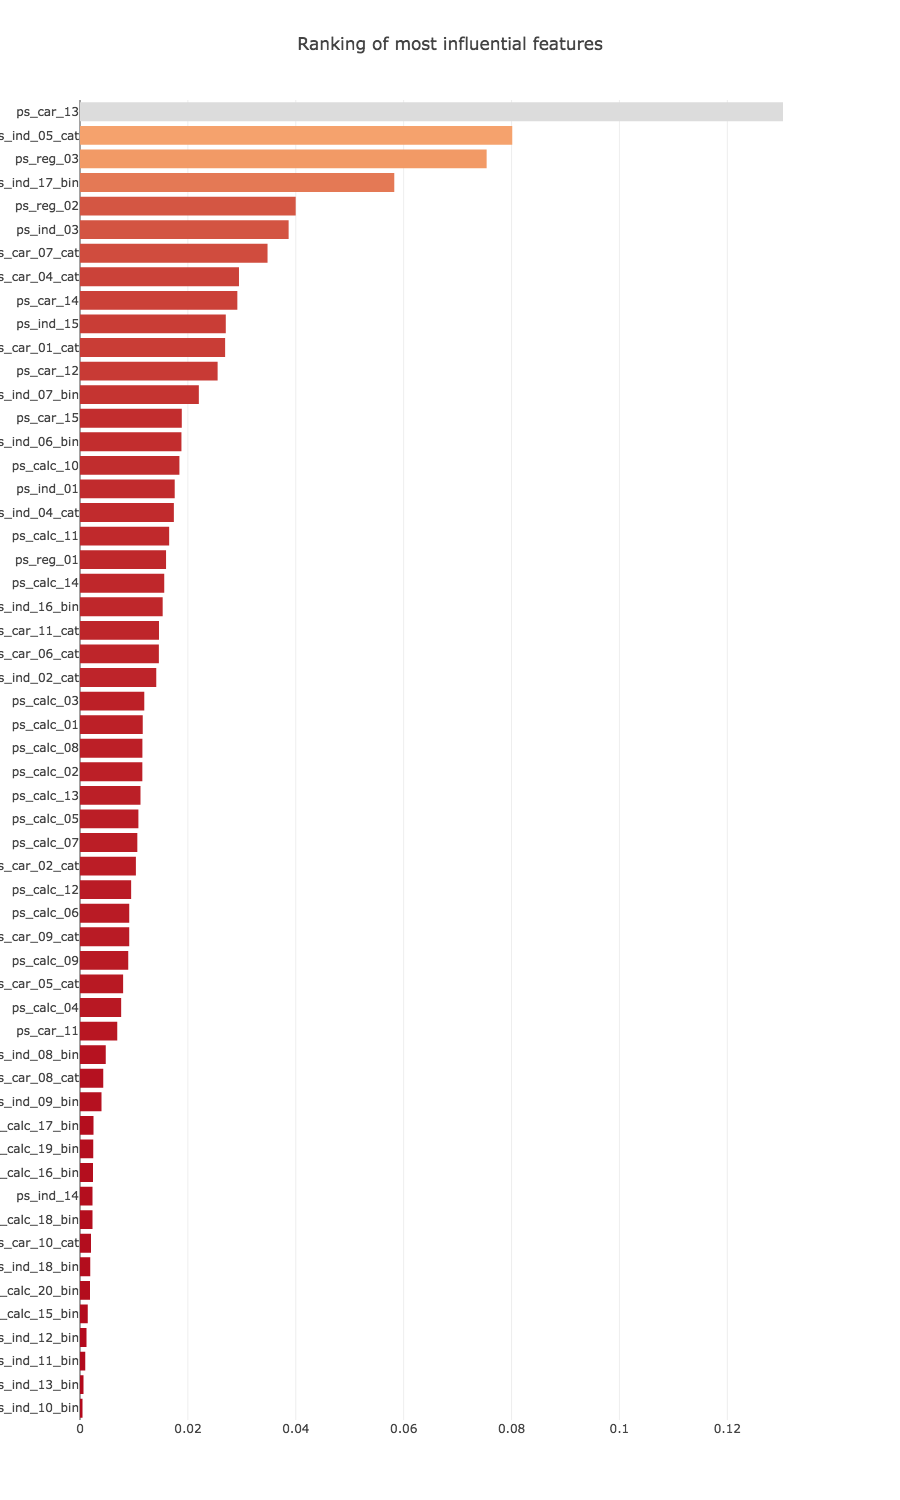

In [93]:
x, y = (list(x) for x in zip(*sorted(zip(clf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = None,
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Ranking of most influential features',
     width = 900, height = 1500,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')
# Due to limited access to colab terminal displaying the pre recorded image below
import IPython
from IPython.display import Image
IPython.display.clear_output()
Image(filename='/content/data/newplot.png') 

**Feature Selection**<br>
Select only the features that have the greatest impact according to the graph above, with a combination of all features types.

In [0]:
feats_to_keep = ['ps_ind_06_bin',
                     'ps_car_15',
                     'ps_ind_07_bin',
                     'ps_car_12',
                     'ps_car_01_cat',
                     'ps_ind_15',
                     'ps_car_14',
                     'ps_car_04_cat',
                     'ps_car_07_cat',
                     'ps_ind_03',
                     'ps_reg_02',
                     'ps_ind_17_bin',
                     'ps_reg_03',
                     'ps_ind_05_cat',
                     'ps_car_13']

In [95]:
# create new dataframe with only selected features, target and id
df_select_feats = df_cleaned[['id', 'target'] + feats_to_keep]

# separate col names into categories
num_feats_to_keep, cat_feats_to_keep, bin_feats_to_keep = [], [], []

for col in feats_to_keep:
    if col == 'id' or col == 'target':
        pass
    elif '_cat' in col:
        cat_feats_to_keep.append(col)
    elif '_bin' in col:
        bin_feats_to_keep.append(col)
    else:
        num_feats_to_keep.append(col)
        
print('--- Numerical features --- : ', '\n', num_feats_to_keep, '\n')
print('--- Categorical features --- : ', '\n', cat_feats_to_keep, '\n')
print('--- Binary features --- : ', '\n', bin_feats_to_keep, '\n')

--- Numerical features --- :  
 ['ps_car_15', 'ps_car_12', 'ps_ind_15', 'ps_car_14', 'ps_ind_03', 'ps_reg_02', 'ps_reg_03', 'ps_car_13'] 

--- Categorical features --- :  
 ['ps_car_01_cat', 'ps_car_04_cat', 'ps_car_07_cat', 'ps_ind_05_cat'] 

--- Binary features --- :  
 ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_17_bin'] 



**Feature engineering**<br>
We still need to deal with the categorical variables because they cannot read in as they are. <br>Creating a dummy variables for each feature. <br>This will greatly increase the number of features that we have, so I would like to minimize these features if we can.

In [0]:
df_engineered = df_select_feats.copy()

Checking on how many categories there are for each feature. This will help us to know which features are going to result in the most additional features after converting them to dummy variables.

In [97]:
df_engineered[cat_feats_to_keep].nunique()

ps_car_01_cat    13
ps_car_04_cat    10
ps_car_07_cat     3
ps_ind_05_cat     8
dtype: int64

In [0]:
cat_dummy_df = pd.get_dummies(df_engineered[cat_feats_to_keep].astype(str))
# Replacing original cat cols with new dummie cols
df_engineered = pd.concat([df_engineered, cat_dummy_df], axis=1).drop(columns=cat_feats_to_keep)

In [98]:
df_engineered.shape

(595212, 17)

**Class Balancing**<br>
Before going into feature scaling, we have to check out the ratio of ones to zeros in the target variable. This step is done to due to the existance of a very large class imbalance. We would not expect half of the people who are insured to lodge a claim.

In [99]:
df_engineered['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

There are many more zeros. <br>
<strong>Under-sampling from examples with a target of zero</strong><br>To handle this we can either over-sample (duplicate the training examples corresponding to the ones) or under-sample (remove training examples corresponding to the zeros).

In [100]:
# number of zeros
num_zeros = (df_engineered['target'] == 0).sum()
# number of ones
num_ones = (df_engineered['target'] == 1).sum()
# difference in the number of zeros and ones
diff = num_zeros - num_ones
# ratios
ones_to_zeros = num_ones / num_zeros
zeros_to_ones = num_zeros / num_ones
print('Ratio of ones to zeros: ', ones_to_zeros * 100, ' %')

Ratio of ones to zeros:  3.7826188541597645  %


Sampling from examples with a target of zero.Selecting a sample that makes up half of the original length of the dataset

In [101]:
df_zeros = df_engineered[df_engineered['target'] == 0]
df_zeros_sample = df_zeros.sample(n=int(rows / 2), random_state=42)
df_zeros_sample.reset_index(inplace=True, drop=True)
df_zeros_sample.head()

,id,target,ps_ind_06_bin,ps_car_15,ps_ind_07_bin,ps_car_12,ps_car_01_cat,ps_ind_15,ps_car_14,ps_car_04_cat,ps_car_07_cat,ps_ind_03,ps_reg_02,ps_ind_17_bin,ps_reg_03,ps_ind_05_cat,ps_car_13
0,465947,0,1,0.00000,0,0.62498,7,5,0.42249,8,1,3,0.20000,0,0.48283,0,0.69673
1,381915,0,0,3.74166,0,0.31623,11,6,0.28879,0,1,9,0.50000,0,0.80893,0,0.76620
2,1060494,0,1,3.46410,0,0.40000,10,8,0.40743,0,1,7,0.80000,1,0.97115,0,0.94069
3,469383,0,0,3.00000,1,0.37417,6,13,0.38210,0,1,8,0.40000,0,0.55110,0,0.87000
4,491496,0,1,3.74166,0,0.40000,7,12,0.30968,1,1,2,0.20000,0,0.50683,0,0.85880


<strong>Over-sampling examples with a target of one</strong><br>Duplicating examples with a target of one of duplicating all of the examples corresponding to ones.

In [0]:
df_ones = df_engineered[df_engineered['target'] == 1]
# Adds duplicates of the ones set until half of the dataset is occupied
df_ones_dup = pd.DataFrame()
for i in range(int((rows / 2) / num_ones)):
    df_ones_dup = df_ones_dup.append(df_ones)

<strong>Combining examples into one dataset</strong><br>
Now I want to combine the two sample sets together to form one dataset of original length, where the ones and zeros are roughly balanced 1:1.

In [103]:
df_rebalanced = pd.concat([df_zeros_sample, df_ones_dup])
df_rebalanced = df_rebalanced.sample(frac=1).reset_index(drop=True)
df_rebalanced.shape

(579628, 17)

The number of rows is similar to what we started with.<br>

**Feature scaling**<br>
Scaling features tends to lead to a performance improvement with classification problems, so we will do it here.

In [0]:
df_scaled = df_rebalanced.copy()
df_scaled.drop(columns=['target', 'id'], inplace=True)
# Set up scaler and create a scaled input matrix
scaler = MinMaxScaler()
# MinMaxScalar outputs data as a numpy array (which is necessary for XGBoost)
X_scaled = scaler.fit_transform(df_scaled)

<strong>Training and Evaluation</strong><br>
Now we can split the data up into train and test sets, fit classification models to the train set and finally try to classify examples from the test set and observe the resulting accuracy and F1 scores.<br> As a first step we will use XGBoost classifier using n_estimators as 300(lower  values gives low accuracy) and will plot the feature importance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



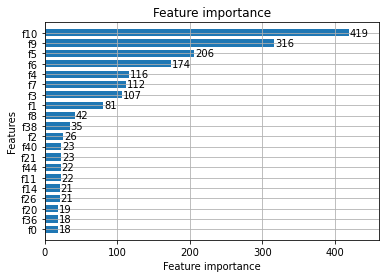

In [0]:
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from xgboost import plot_importance
X = X_scaled
# y needs to be converted to an array
y = df_rebalanced['target'].as_matrix()
# split up the data and target values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelxg = XGBClassifier(n_estimators=300)
modelxg.fit(X_train, y_train)
plot_importance(modelxg,height=0.7, title='Feature importance', xlabel='Feature importance',max_num_features=20)
plt.show()

Now lets try to create a confusion matrix and also will print the accuracy of XGBoost classifier algorithm.<br>
We also do a prediction and will save the outcome as submission_xgb.csv file as an output of this project exercise.

In [0]:
from sklearn.metrics import confusion_matrix
from termcolor import colored
prediction_xgb = modelxg.predict(X_test)
print(prediction_xgb,y_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, prediction_xgb)
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set_xgb = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set while using XGBoost is: ', 'blue'), colored(round(predict_accuracy_on_test_set_xgb,2)*100, 'blue'),colored('%', 'blue'))
# Classification report
report = classification_report(y_test, prediction_xgb)
print('\n', report, '\n')
#Since the training , testing and evaluation is done on a scaled dataset df_scaled ,
#I am unable to print the id variable as it was already being droped in earlier step.There by outputting only prediction and actual as submission
submission_xgb = pd.DataFrame({
        "Actual": y_test,
        "Prediction_xgb": prediction_xgb
    })
submission_xgb.to_csv('/content/output/submission_xgb.csv', index=False)
print(colored('XGBoost submission output has been saved Sucessfully to the output directory /content/output/submission_xgb.csv','red'))

[1 0 1 ... 1 0 0] [1 1 1 ... 1 0 0]
The Confusion Matrix is:  
 [[40331 19150]
 [26186 30259]]
The Accuracy on Test Set while using XGBoost is:  61.0 %

               precision    recall  f1-score   support

           0       0.61      0.68      0.64     59481
           1       0.61      0.54      0.57     56445

    accuracy                           0.61    115926
   macro avg       0.61      0.61      0.61    115926
weighted avg       0.61      0.61      0.61    115926
 

XGBoost submission output has been saved Sucessfully to the output directory /content/output/submission_xgb.csv


In [0]:
joblib.dump(modelxg, '/content/trained_models/xgboost_model.pkl')

['/content/trained_models/xgboost_model.pkl']

Now let's try to run same steps using RandomForestClassifier algorithm as well to see if the accuracy increases or not.

In [0]:
from sklearn.ensemble import RandomForestClassifier
model_rand = RandomForestClassifier(n_estimators=300)

model_rand.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
from termcolor import colored
prediction_rand = model_rand.predict(X_test)
print(prediction_rand,y_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, prediction_rand)
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set_rand = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set while using RandomForestClassifier is: ', 'blue'), colored(round(predict_accuracy_on_test_set_rand,2)*100, 'blue'),colored('%', 'blue'))
# Classification report
report = classification_report(y_test, prediction_rand)
print('\n', report, '\n')
#Since the training , testing and evaluation is done on a scaled dataset df_scaled ,
#I am unable to print the id variable as it was already being droped in earlier step.There by outputting only prediction and actual as submission
submission_rand = pd.DataFrame({
        "Actual": y_test,
        "Prediction_gradnt": prediction_rand
    })

submission_rand.to_csv('/content/output/submission_rand.csv', index=False)
print(colored('RandomForestClassifier submission output has been saved Sucessfully to the output directory /content/output/submission_rand.csv','red'))

[1 1 1 ... 1 0 0] [1 1 1 ... 1 0 0]
The Confusion Matrix is:  
 [[59361   120]
 [    0 56445]]
The Accuracy on Test Set while using RandomForestClassifier is:  100.0 %

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59481
           1       1.00      1.00      1.00     56445

    accuracy                           1.00    115926
   macro avg       1.00      1.00      1.00    115926
weighted avg       1.00      1.00      1.00    115926
 

RandomForestClassifier submission output has been saved Sucessfully to the output directory /content/output/submission_rand.csv


In [0]:
joblib.dump(model_rand, '/content/trained_models/RandomForest_model.pkl')

['/content/trained_models/RandomForest_model.pkl']

In [56]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=42)
#Fitting the training data to the network

classifier.fit(X_train, y_train)
#Predicting y for X_test
prediction_mlp = classifier.predict(X_test)
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(prediction_mlp, y_test)

print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set_mlp = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set while using MLPClassifier is: ', 'blue'), colored(round(predict_accuracy_on_test_set_mlp,2)*100, 'blue'),colored('%', 'blue'))
# Classification report
report = classification_report(y_test, prediction_mlp)
print('\n', report, '\n')


The Confusion Matrix is:  
 [[47898 14033]
 [11583 42412]]
The Accuracy on Test Set while using MLPClassifier is:  78.0 %

               precision    recall  f1-score   support

           0       0.77      0.81      0.79     59481
           1       0.79      0.75      0.77     56445

    accuracy                           0.78    115926
   macro avg       0.78      0.78      0.78    115926
weighted avg       0.78      0.78      0.78    115926
 



In [57]:
joblib.dump(classifier, '/content/trained_models/MLPClassifier_model.pkl')

['/content/trained_models/MLPClassifier_model.pkl']

**Training and Evaluation - Continued**<br>
Now we can split the data up into train and test sets, fit classification models to the train set and finally try to classify examples from the test set and observe the resulting accuracy.


++++++++++++++ LogisticReg ++++++++++++++


--- Training model using LogisticReg ---


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



=== DONE ===


               precision    recall  f1-score   support

           0       0.59      0.67      0.63     59481
           1       0.59      0.50      0.54     56445

    accuracy                           0.59    115926
   macro avg       0.59      0.59      0.58    115926
weighted avg       0.59      0.59      0.59    115926
 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



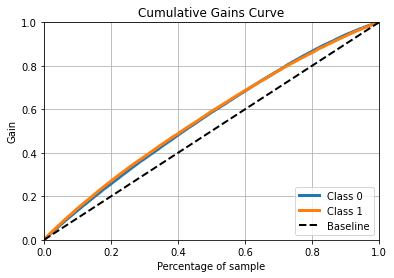



++++++++++++++ Linear SVM ++++++++++++++


--- Training model using Linear SVM ---


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



=== DONE ===


               precision    recall  f1-score   support

           0       0.43      0.24      0.31     59481
           1       0.46      0.68      0.55     56445

    accuracy                           0.45    115926
   macro avg       0.45      0.46      0.43    115926
weighted avg       0.45      0.45      0.42    115926
 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



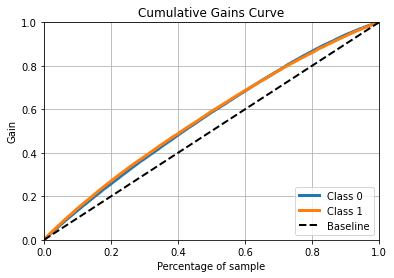

In [58]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
models = []
models.append(('LogisticReg',LogisticRegression(random_state=42)))
models.append(('Linear SVM',SVC(kernel='linear', gamma=0.05, C=30,max_iter=1000)))

for name, model in models:
    print('\n++++++++++++++ {} ++++++++++++++\n'.format(name))

    # Train model
    print('\n--- Training model using {} ---'.format(name))
    model.fit(X_train, y_train)
    print('=== DONE ===\n')
    
    # Save model
    joblib.dump(model, '/content/trained_models/{}_model_trained.pkl'.format(name))
    
    # Make predictions on the test-set
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred)
    print('\n', report, '\n')

    # Plotting cumulative gains chart (lift curve)
    LogReg_model = LogisticRegression().fit(X=X_train,y=y_train)
    predicted_probas = LogReg_model.predict_proba(X_test)
    skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
    plt.show()
    
    print('======================================\n')

# Project Report/ Synopsis and answer to the problems given in the project questionaire

# Exploratory Data Analysis Questionnaire and Answers:
1. <strong>Write at least 3 important inferences from the data above(train.csv)</strong><br>
*   The given dataset contains 595212 rows of data with 59 columns. The target variable is in the form of 0 and 1 and all other variables are numeric and there by the dataset is suitable for Exploratory data analysis
*   The target variable contains only 0 and 1.But this variables are not uniformly distributed and there by balancing is required on this target variable
*   The dataset contains missing values  which needs to be adressed and also categorical features and binary features and numerical features are available in the dataset.

2. <strong>Is the data balanced? Meaning are targets 0 and 1 in the right proportion?</strong>

*   No. The Data is not balanced for the train.csv file given.While doing visualization of the target variable proportion and distribution as a pie chart we have observed it clearly that the value 0 is having major portion in the target variable as compared to the other value available as 1 .Inorder to overcome this issue we have applied sampling technicque and has balanced the target variable


3. <strong>How many categorical features are there?</strong><p>
 There are mainly 14 Categorical features available in the dataset and is as given below<p>
*  ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'] 

4. <strong>How many binary features are there?</strong>

*   There are mainly 17 Binary features  available in the dataset and is as given below
*  ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']

<br>
5. <strong>Write inferences from data on interval variables.</strong>
<p>The numerical features consist of interval and ordinal variables.We have tried to find out how many missing values there are for each feature type and has tried to Eliminate the features where more than one half of the values are missing. What we have obssreved is that the inetrval variables have less amount of missing data and the same has been substituted with applicable mean.</p><br>
6. <strong>Write inferences from data on ordinal variables.</strong><br>
<p>Eventhough there are multiple ordinal values available in the given dataset the margin of missing values is very less.We have observed only one ordinal variable with more than 50 % of missing value as ps_car_03_cat.</p>
7. <strong>Write inferences from data on binary variables.</strong> 
<p>For the binary variables no columns were returned where more than half of there values missing. we also made sure that no values at all are missing for the binary features.</p><br>
8. <strong>Check if the target data is proportionate or not.Hint: Below than 30% for binary data is sign
of imbalance</strong>
<p>The target variable is  not proportionate. Initially when we tried to plot a pie chart it was evident that only 3.6 of the target variable is havinga  value of 1 and rest all values where 0s.</p>
9. <strong>What should be the preferred way in this case to balance the data?</strong><br><p>
For doing balancing first we have figured out the indices of the unbalanced data per target indices and has randomly selected records with target=0 to get at the desired a priori, then calculated the undersampling rate and resulting number of records with target=0.Constructed a list with remaining indices and returned undersample data frame back to train dataset.The final result was as follows</p> 
*   Rate to undersample records with target=0 :0.34043569687437886<br>
*   Number of records with target=0 after undersampling: 195246<br>
10. <strong>How many training records are there after achieving a balance of 12%?</strong><p>
After balancing and data pre processing the resulted dataframe [df_rebalanced] was having the shape as (579628, 47) ahead of the original dataframe [df] of (595212, 59). That means , some rows where added , but total number of columns reduced to 47 from 59.</p>
11. <strong>Which are the top two features in terms of missing values?</strong>
The top two columns with missing values are as given below
*   col1 : ps_car_03_cat    missing count : 4,11,231
*   col2 : ps_car_05_cat    missing count : 2,66,551<br>
12. <strong>In total, how many features have missing values?</strong>
In total 12 columns have missing values and they are as given below
<br>Column-----------> Missing count----->Missing ratio
<br>ps_ind_02_cat --->  216   --->   0.000
<br>ps_ind_04_cat --->  83  --->    0.000
<br>ps_ind_05_cat     ---> 5809  --->  0.010<br>
ps_car_01_cat    --->107    ---> 0.000<br>
ps_car_03_cat    --->411231 ---> 0.691<br>
ps_car_05_cat    --->266551 ---> 0.448<br>
ps_car_07_cat    --->11489  ---> 0.019<br>
ps_car_09_cat    --->569   --->  0.001<br>
ps_reg_03 --------> 107772 --->  0.181<br>
ps_car_11    	---> 5    --->	 0.000<br>
ps_car_12    	---> 1    --->	 0.000<br>
ps_car_14    --->  42620  --->  	 0.072<br>
13. <strong>What steps should be taken to handle the missing data?</strong><br><p>
We have substituted the missing values with the applicable column mean. This have limited their impact on the results.</p>
14. <strong>Which interval variables have strong correlation?</strong><p>
ps_reg02 and ps_reg03 have highest correlation among interval variables</p>
15. <strong>What's the level of correlation among ordinal features?</strong><br><p>
The correlations are very small, so not worthy of consideration.</p>
16. <strong>Implement Hot Encoding for categorical features</strong><br><p>
We have removed most of the categoricalfeartures after feature engineering and tehre by the resulting feature list or categorical columns doesn't require one hot enncoding.</p>
17. <strong>In nominal and interval features, which features are suitable for StandardScaler?</strong><br><p>
Scaling features tends to lead to a performance improvement with classification problems, and hence we taken both interval and nominal features in to consideration.</p>
18. <strong>Summarize the learnings of ED</strong><br><p>The given dataset contains 595212 rows of data with 59 columns. But the dataset had many missing values and Nan values as well as the target variable was not uniformly distributed. Majority of the missing values on ordinal and interval variable has been replaced with corresponding mean and for categorical features & binary features with missing values low person coeff has been removed. Also done balancing on the target variable as well as applied sampling and unsampling techniques for the given dataset to create a finalized dataframe and values has ben scaled using MinMaxScaler for ingesting the same in to various classification algorithms. The final data has been split using train_test_split function and has feeded to classification algorithm and prediction has been made and also the accuracy has been calculated and printed.</p>

# Modelling Questionnaire and Answers:

1. <strong>The Simple Logistic Regression Model seems to have high accuracy.Is that what we need at
all? What is the problem with this model?</strong><br><p>
I have tried to fit the given data with Logistic regression model. But the accuracy was very low as compared to Random Forest Classifier/Accuracy was found to be nearly 0.59 or 0.62 for both of the target variables . Even XGBoost and Linear SVM where also having low accuracy for prediction.
</p><br>
2. <strong>Why do you think f1-score is 0.0?</strong><br><p>An F1-score means a statistical measure of the accuracy of a test or an individual. It is composed of two primary attributes, viz. precision and recall, both calculated as percentages and combined as harmonic mean to assign a single number, easy for comprehension.F1 score 0.0 means that the both the testing and training accuracy was poor and it indicates under fitting.
</p><br>
3. <strong>What is the precision and recall score for the model?</strong><br><p>I have tried Random Forest, XGBoost, Logistic regression, Linear SVM and MLP classifier for the given dataset.
Corresponding Precision  and recall and accuracy is as given below
<br>Algorithm: Random Forest --> Precision  : 1, Accuracy : 1, Recall : 1<br>
Algorithm: XGBoost --> Precision  : 0.59 , Accuracy : 0.61, Recall : 0.62<br>
Algorithm: Logistic Regression --> Precision  : 0.59, Accuracy : 0.58, Recall : 0.58<br>
Algorithm: LinearSVC --> Precision  : 0.46, Accuracy : 0.46, Recall : 0.46<br>
Algorithm: MLPClassifier --> Precision  : 0.79, Accuracy : 0.78, Recall : 0.79<br>
</p><br>
4. <strong>What is the most important inference you can draw from the result?</strong><br><p>I personally felt like the Random Forest algorithm suits best for the given dataset based on the precision and accuracy rates. XGBoost and Linear SVM as well playes an important role , but accuracy is low</p><br>
5. <strong>What is the accuracy score and f1-score for the improved Logistic Regression model?</strong><br><p>Algorithm: Logistic Regression --> Precision  : 0.59, Accuracy : 0.58, Recall : 0.58<br></p><br>
6. <strong>Why do you think f1-score has improved?</strong><br><p>F-measure or balanced F-score (F1 score) is the harmonic mean of precision and recall.Logistic regression model uses cumulative gain approach , which can improve the f1 score by increasing the precision and recall rate. </p><br>
7. <strong>For model LinearSVC play with parameters – dual, max_iter and see if there is any
improvement</strong><br><p>Tried the same , but no such improvements has been observed</p><br>
8. <strong>SVC with Imbalance Check & Feature Optimization & only 100K Records → is there
improvement in scores?</strong><br><p>I havn't tried this</p><br>
9. <strong>XGBoost is one the better classifiers -- but still f1-score is very low. What could be the
reason?</strong><br><p>I agree to the fact that the XGBoost is a better classifier. But for the given dataset the precision and recall rate was very low.As F1 score is a direct measure of these two parameters , the score has went down.</p><br>
10. <strong>What is the increase in number of features after one-hot encoding of the data?</strong><br><p>After the encoding the number of features got almost doubled</p><br>
11. <strong>Is there any improvement in scores after encoding?</strong><br><p>Yes. Encoding has improved the classification accuracy</p><br>
12. <strong>If not missing a positive sample is the priority which model is best so far?</strong><br><p>RandomForest Algorithm and XGBoostalgoritms seems to be better for the classification in this case.</p><br>
13. <strong>If not marking negative sample as positive is top priority, which model is best so far?</strong><br><p>RandomForest Algorithm is the best classification algorithm in this case.</p><br>
14. <strong>Do you think using AdaBoost can give any significant improvement over XGBoost?</strong><br><p>Yes. Adaboost classifier have better recall and accuracy than XGBoost for the given dataset</p><br>
15. <strong>MLPClassifier is the neural network we are trying. But how to choose the right no. of layers
and size?</strong><br><p>Default layers is 100 for MLP classifier. We need to do trial and error method to find out the best layers and size.</p><br>
16. <strong>At what layer size we get the best f1-score?</strong><br><p>The default number of hidden layer is 100.I have tried the MLP classifier with 50 , 100 and 150 layers and found out that the default layer of 100 gives best accuracy and f1 score.</p><br>

# Project Synopsis & Summary

# Aim of the Project
The aim of the project is to build a Machine Learning
Model to predict whether an owner will initiate an auto
insurance claim in the next year<br><br>
# Background
The auto insurance industry is witnessing a paradigm shift. Since auto insurance company
consists of homogenous good thereby making it difficult to differentiate product A from
product B, also companies are fighting a price war (for insurance price). On top of that, the
distribution channel is shifting more from traditional insurance brokers to online purchases,
which means that the ability for companies to interact through human touchpoints is limited,
and customers should be quoted at a reasonable price. A good price quote is one that makes
the customer purchase the policy and helps the company to increase the profits. <br><br>
# Problem statement
<p>Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. 
</p><p>The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.<br>
The problem statement for the project is to create a suitable model which will predict the probability that an auto insurance policy holder files a claim. You will be given a train.csv, a dataset with 600k training data and 57 features/data.</p><p>In the
train and test data, features that belong to similar groupings are tagged as such in the feature
names (e.g., ind, reg, car, calc)</p><br><br>

# Solution / Architecture used
<p>Various techniques used for reaching out to the final solution is summarized as given below</p>
1. Data Pre processing and Feature engineering.<br>
2. Categorization of features and finding out correlation coeff to do the feature selection and also data cleansing by removing or replacing missing values and NaN values<br>
3. Encoding and sampling techniques has been applied to define a better data set for feeding in to algorithms<br>
4. Data classification using below given algorithms
<br><strong>Random Forest Classifier</strong><p>
It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.</p><strong>XGBoostClassifier</strong><p>XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.
</p>
<br><strong>Logistic Regression</strong><p>Logistic Regression is a ‘Statistical Learning’ technique categorized in ‘Supervised’ Machine Learning (ML) methods dedicated to ‘Classification’ tasks. It has gained a tremendous reputation for last two decades especially in financial sector due to its prominent ability of detecting defaulters.
</p>
<br><strong>MLP Classifier</strong><p>MLP Classifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.
</p>
<br><strong>SVM Classifier</strong><p>In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier
</p>

# Real World applications / business use cases
1. <strong>Conquering Market Share:</strong> Capture market share by lowering the prices of the premium
for the customers, who are least likely to claim.
2. <strong>Risk Management:</strong> Charge the right premium from the customer, who is likely to claim
insurance in the coming year
3. <strong>Smooth Processing:</strong> Reduce the complexity of pricing models. Most of the transactions
are happening online with larger customer attributes (thanks to the internet and social
media). Harness the power of huge data to build complex ML models
4. <strong>Increased Profits:</strong> As per industry estimate 1% reduction in the claim can boost profit by
10%. So, through the ML model, we can identify and deny the insurance to the driver
who will make a claim. Thus, ensuring reduced claim outgo and increased profit. <br><br>

# Summary
In this project, we have been challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers. The dataset was really challenging as it had multiple missing and unbalanced data.Exploratory data analysis or EDA has helped us to do a proper processing of various features and to understand the data in depth and also we could be able to visualize each of the individual features in depth.We got an opportunity to apply various algorithms such as RandomForest,XGBoost,SVM,MLP,Logistic Regression etc and could be able to compare the results of each of the algorithms to reach out to a conclusion on the better algorithm to be picked up.Overall the project has given an opportunity to apply multiple deep learning skills in a single project.

# Conclusion
We have done EDA, Feature engineering, Feature selection, visualization of the features and also applied various algorithms and could be able to predict the possiblity of a given driver to be safe or not. Multiple models have been created and the best one will be picked up and will be used for further implementation.

# Referances
[1] https://www.kaggle.com/c/porto-seguro-safe-driver-prediction <br>
[2] Xianzhi Liu, Qingquan Song - Safe Driver Prediction Base on Different Machine Learning Models <br>
[3] Feiyang Pan,Xiang Ao - Institute of Computing Technology -A Simple and Empirically Strong
Method for Reliable Probabilistic Predictions<br>
[4] Muhammad Arief Fauzan, Hendri Murfi -Department of Mathematics, Universitas Indonesia - The Accuracy of XGBoost for Insurance Claim Prediction<br>
[5] Matthew Millican & Laura Zhang - CS 229 Final Report: Predicting Insurance Claims in Brazil
